# BANK LOAN DEFAULT PREDICTION

In [183]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier

In [184]:
#load the dataset and check the first five columns
df = pd.read_csv("/content/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [185]:
#checking the columns
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [186]:
#checking the shape of the data
df.shape

(148670, 34)

We have 148670 rows and thirty four columns

In [187]:
# Checking the datatypes
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

We note that we have several object type data in our dataset which we will have to change to numeric.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [189]:
#checking for null values
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

There are alot of missing values in our dataset. Specifically in the columns, loan_limit, approv_in_adv,loan_purpose, rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,property_value,income,age,submission_of_application,LTV,dtir1

In [190]:
# checking the percentage of missing data to know how to deal with it
missing_percentage= (df.isna().sum())/len(df)
perc=(missing_percentage*100).apply(lambda x: f'{x:.2f}%')
perc



ID                            0.00%
year                          0.00%
loan_limit                    2.25%
Gender                        0.00%
approv_in_adv                 0.61%
loan_type                     0.00%
loan_purpose                  0.09%
Credit_Worthiness             0.00%
open_credit                   0.00%
business_or_commercial        0.00%
loan_amount                   0.00%
rate_of_interest             24.51%
Interest_rate_spread         24.64%
Upfront_charges              26.66%
term                          0.03%
Neg_ammortization             0.08%
interest_only                 0.00%
lump_sum_payment              0.00%
property_value               10.16%
construction_type             0.00%
occupancy_type                0.00%
Secured_by                    0.00%
total_units                   0.00%
income                        6.15%
credit_type                   0.00%
Credit_Score                  0.00%
co-applicant_credit_type      0.00%
age                         

All the missing values are below 30% and hence I will impute using KNNImputer rather than dropping them.

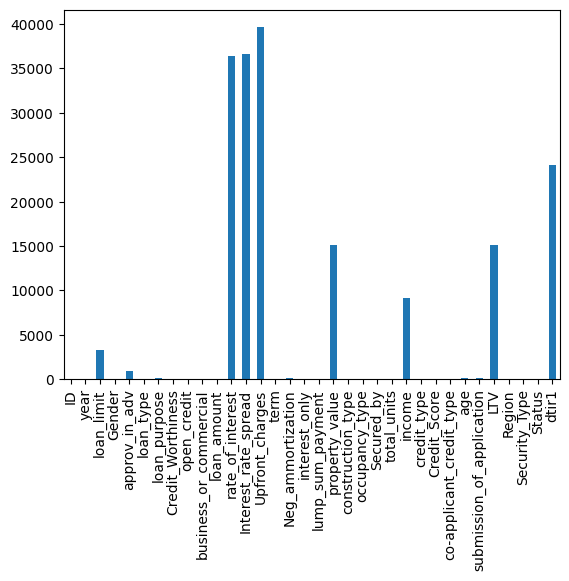

In [191]:
df.isna().sum().plot.bar()
plt.show()

In [192]:
#creating a list of categorical and numeric functions
categ_var=[]
numeric_var=[]
for i in df.columns:
  if (df[i].dtype=="object"):
    categ_var.append(i)
  else:
    numeric_var.append(i)

In [193]:
print("cat_var", categ_var,"\n")
print("numeric_var",numeric_var,"\n")

cat_var ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type'] 

numeric_var ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1'] 



## Imputing Missing Values using SimpleImputer

In [194]:
from sklearn.impute import SimpleImputer

# Identify missing values
missing_cols = df.columns[df.isnull().any()]

# Impute missing values using most frequent for categorical columns
imputer = SimpleImputer(strategy='most_frequent')
df[missing_cols] = imputer.fit_transform(df[missing_cols])


In [195]:
#checking missing vales
df.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

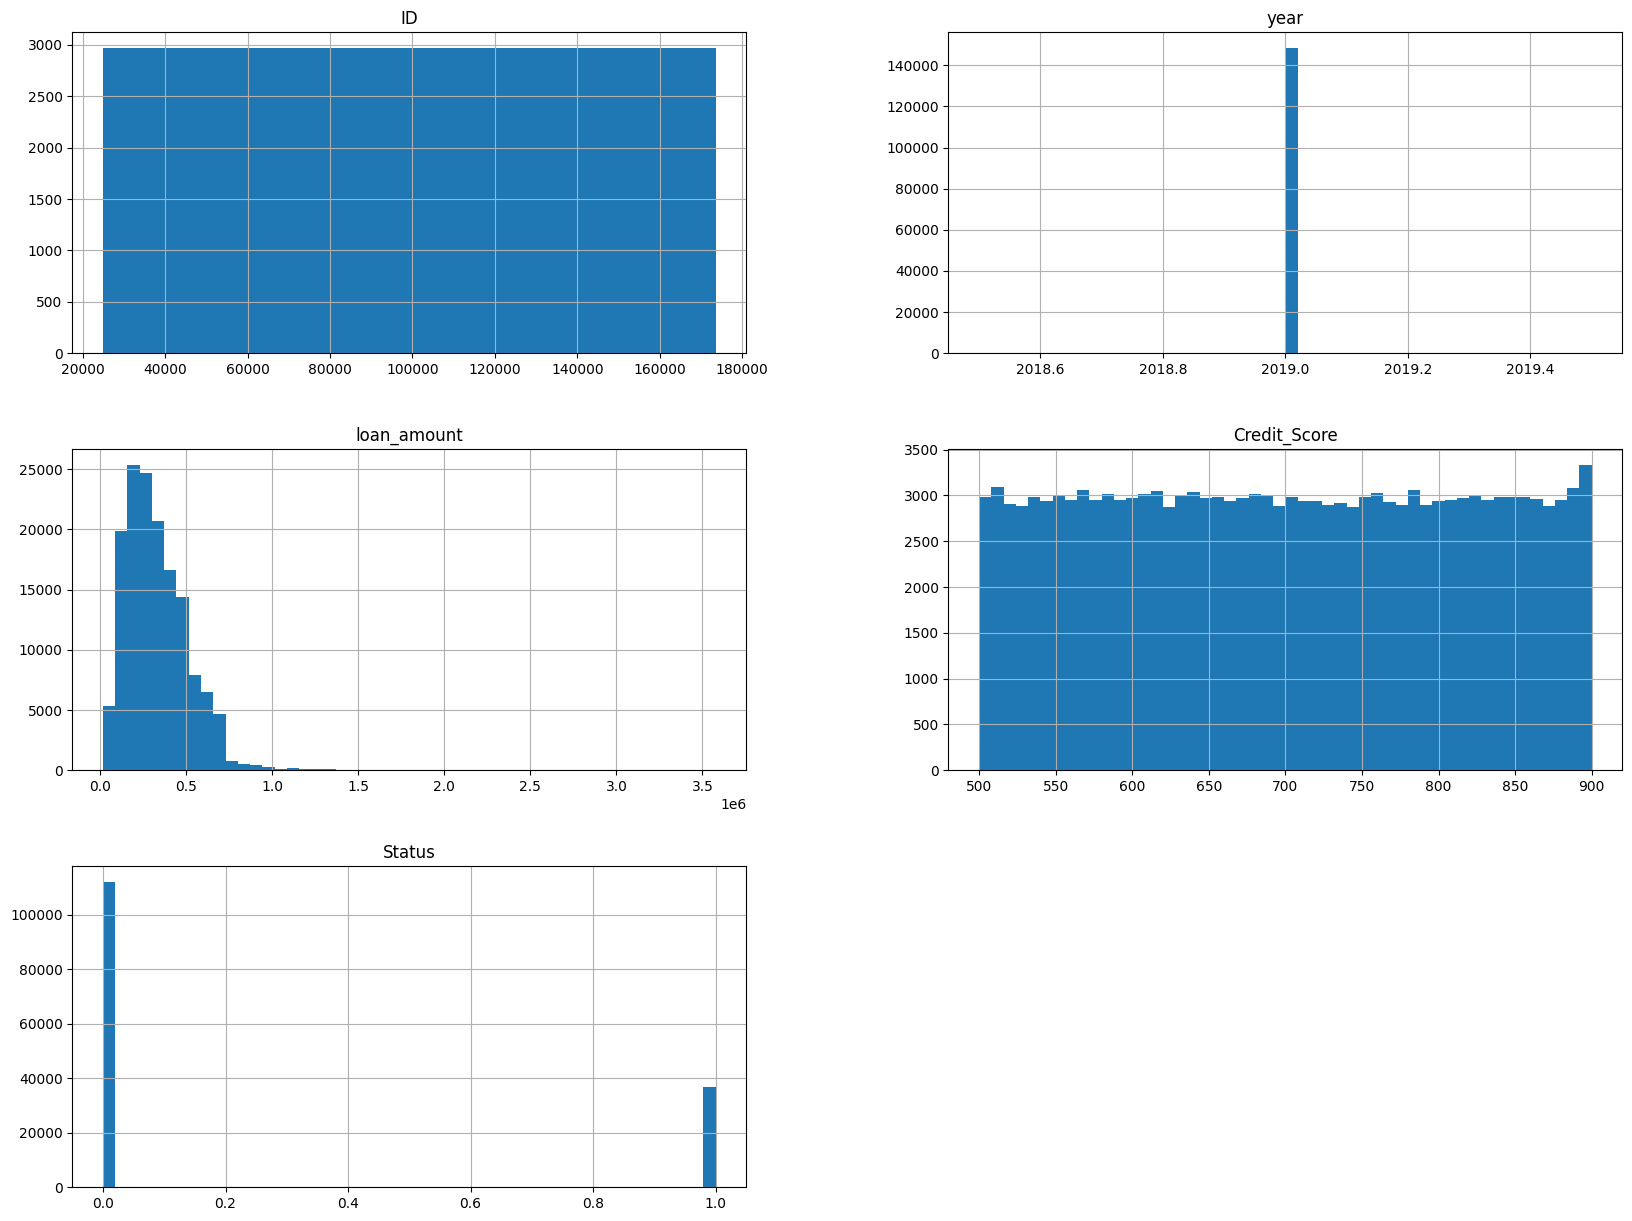

In [196]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [197]:
# status value count
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

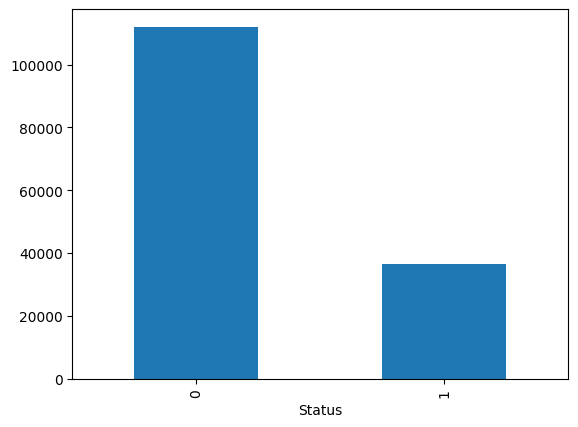

In [198]:
#plot showing the count of status column to check for class imbalance
df['Status'].value_counts().plot(kind='bar')
plt.show()

From the plot above we note that there is a class imbalance and hence we have to balance the classes later on.

In [199]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store the mappings
label_mappings = {}

# Loop through each categorical variable and encode it
for var in object_columns:
    label_encoder.fit(df[var])
    label_mappings[var] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mappings
for var, mapping in label_mappings.items():
    print(f"\nMapping for {var}:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} -> {encoded_value}")



Mapping for loan_limit:
  cf -> 0
  ncf -> 1

Mapping for Gender:
  Female -> 0
  Joint -> 1
  Male -> 2
  Sex Not Available -> 3

Mapping for approv_in_adv:
  nopre -> 0
  pre -> 1

Mapping for loan_type:
  type1 -> 0
  type2 -> 1
  type3 -> 2

Mapping for loan_purpose:
  p1 -> 0
  p2 -> 1
  p3 -> 2
  p4 -> 3

Mapping for Credit_Worthiness:
  l1 -> 0
  l2 -> 1

Mapping for open_credit:
  nopc -> 0
  opc -> 1

Mapping for business_or_commercial:
  b/c -> 0
  nob/c -> 1

Mapping for Neg_ammortization:
  neg_amm -> 0
  not_neg -> 1

Mapping for interest_only:
  int_only -> 0
  not_int -> 1

Mapping for lump_sum_payment:
  lpsm -> 0
  not_lpsm -> 1

Mapping for construction_type:
  mh -> 0
  sb -> 1

Mapping for occupancy_type:
  ir -> 0
  pr -> 1
  sr -> 2

Mapping for Secured_by:
  home -> 0
  land -> 1

Mapping for total_units:
  1U -> 0
  2U -> 1
  3U -> 2
  4U -> 3

Mapping for credit_type:
  CIB -> 0
  CRIF -> 1
  EQUI -> 2
  EXP -> 3

Mapping for co-applicant_credit_type:
  CIB ->

In [200]:
# Update DataFrame with encoded values
for var, mapping in label_mappings.items():
    df[var] = df[var].map(mapping)


In [201]:
df.dtypes

ID                            int64
year                          int64
loan_limit                    int64
Gender                        int64
approv_in_adv                 int64
loan_type                     int64
loan_purpose                  int64
Credit_Worthiness             int64
open_credit                   int64
business_or_commercial        int64
loan_amount                   int64
rate_of_interest             object
Interest_rate_spread         object
Upfront_charges              object
term                         object
Neg_ammortization             int64
interest_only                 int64
lump_sum_payment              int64
property_value               object
construction_type             int64
occupancy_type                int64
Secured_by                    int64
total_units                   int64
income                       object
credit_type                   int64
Credit_Score                  int64
co-applicant_credit_type      int64
age                         

In [202]:
numeric_cols = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term',
                'property_value', 'income', 'LTV', 'dtir1']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the updated DataFrame
print(df.dtypes)


ID                             int64
year                           int64
loan_limit                     int64
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
property_value               float64
construction_type              int64
occupancy_type                 int64
Secured_by                     int64
total_units                    int64
income                       float64
credit_type                    int64
Credit_Score                   int64
co-applicant_credit_type       int64
a

In [203]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,116500,3.99,-0.0280,0.0,360.0,1,1,1,118000.0,1,1,0,0,1740.0,3,758,0,0,1,98.728814,3,1,1,45.0
1,24891,2019,0,2,0,1,0,0,0,0,206500,3.99,-0.0280,0.0,360.0,1,1,0,308000.0,1,1,0,0,4980.0,2,552,1,3,1,81.250000,0,1,1,37.0
2,24892,2019,0,2,1,0,0,0,0,1,406500,4.56,0.2000,595.0,360.0,0,1,1,508000.0,1,1,0,0,9480.0,3,834,0,1,1,80.019685,3,1,0,46.0
3,24893,2019,0,2,0,0,3,0,0,1,456500,4.25,0.6810,0.0,360.0,1,1,1,658000.0,1,1,0,0,11880.0,3,587,0,2,0,69.376900,0,1,0,42.0
4,24894,2019,0,1,1,0,0,0,0,1,696500,4.00,0.3042,0.0,360.0,1,1,1,758000.0,1,1,0,0,10440.0,1,602,1,0,0,91.886544,0,1,0,39.0


In [205]:
df.shape

(148670, 34)

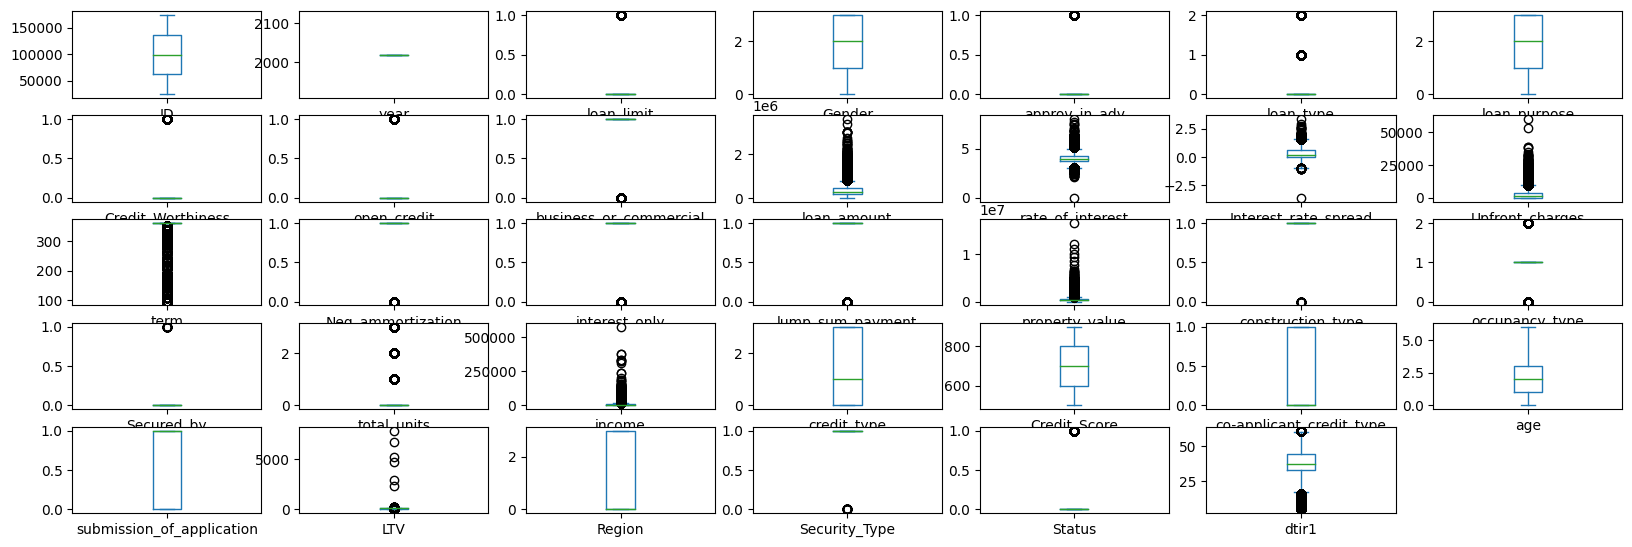

In [215]:
df.plot(kind="box", subplots=True, layout=(15, 7), figsize=(20, 20));

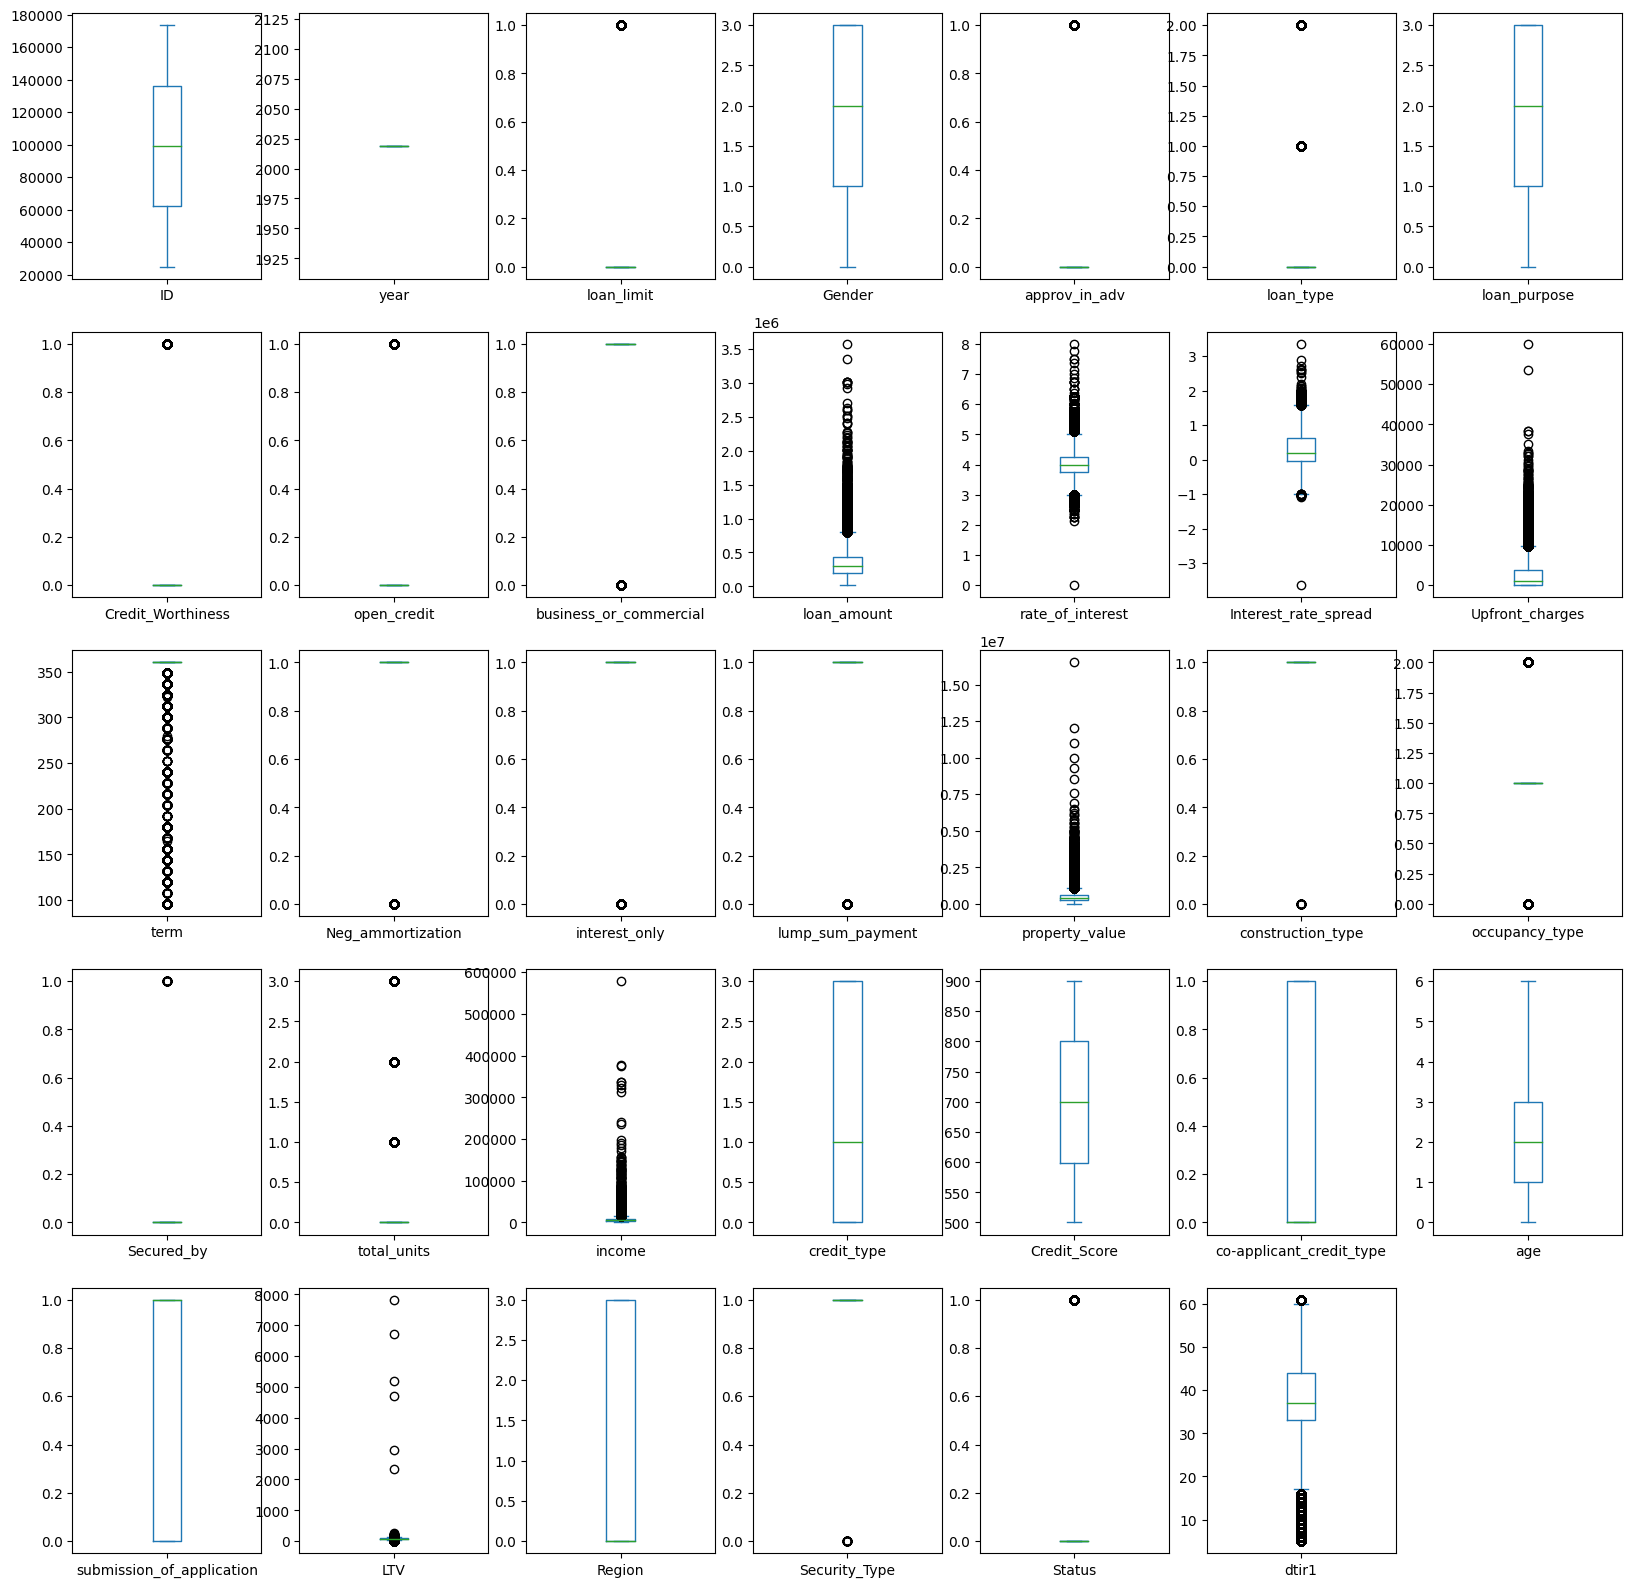

In [218]:
# Determine the number of rows and columns needed to fit 34 plots
num_plots = 34
num_cols = 7
num_rows = (num_plots - 1) // num_cols + 1

# Plot the box plots with the determined layout
df.plot(kind="box", subplots=True, layout=(num_rows, num_cols), figsize=(20, 20));
